In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r"C:\Users\KABEERJR\Downloads\titanic new.csv")
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


CLEANING OF THE RAW DATA 

In [6]:

print(data.isnull().sum())

median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)

data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

columns_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(columns_to_remove, axis=1, errors='ignore', inplace=True)
data




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


CREATING A CORRELATION MATRIX TO UNDERSTAND THE RELATIONS BETWEEN THE COLOUMNS DATA


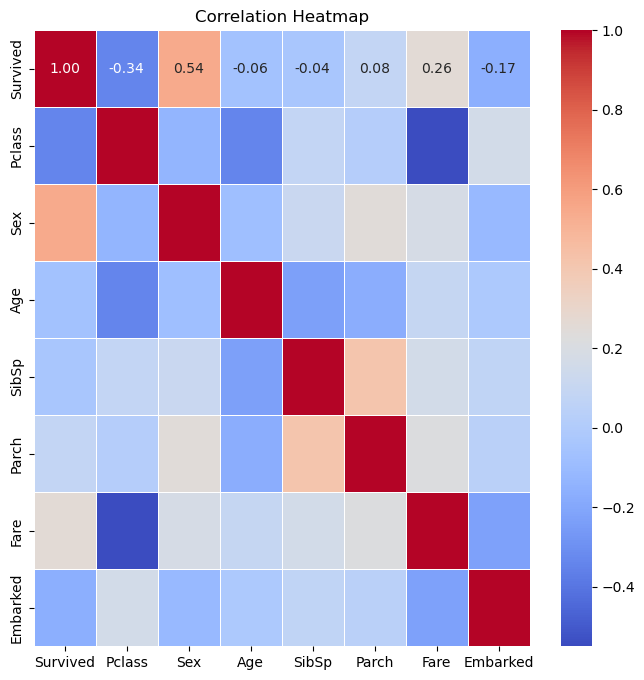

In [7]:

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

corr_matrix = data.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

CALCULATING AND VISUALIZAING THE SURVIVAL RATE OF PEOPLE

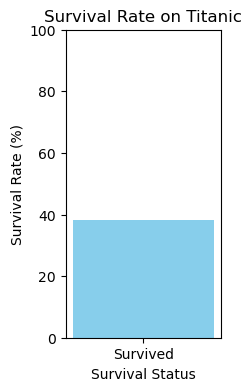

In [8]:
survival_rate = data['Survived'].mean() * 100

plt.figure(figsize=(2, 4))
plt.bar(['Survived'], [survival_rate], color='skyblue')
plt.xlabel('Survival Status')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate on Titanic')
plt.ylim(0, 100)
plt.show()

VISUALIZING SURVIVAL COUNT BASED ON GENDER

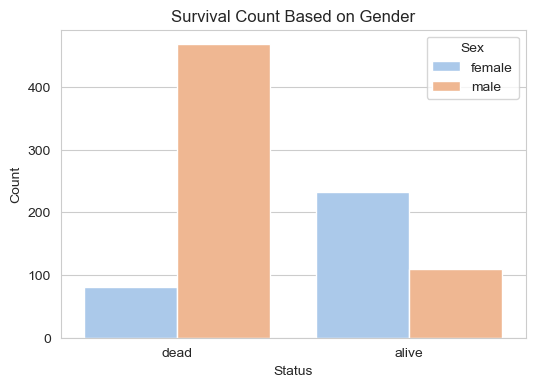

In [9]:

data['Sex'] = data['Sex'].map({0: 'male', 1: 'female'})
data['Survived']=data['Survived'].map({0:'dead',1:'alive'})

sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data= data, palette='pastel')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Survival Count Based on Gender')
plt.legend(title='Sex')
plt.show()

VISUALIZING SURVIVAL PERCENTAGE BASED ON GROUP OF AGE'S

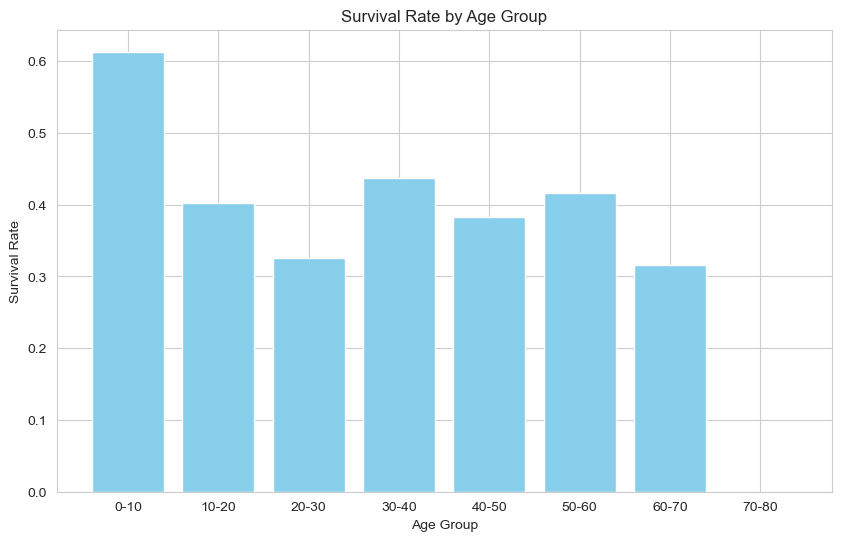

In [10]:
data['Survived']=data['Survived'].map({'dead':0,'alive':1})
age_bins = range(0, 90, 10)

survival_rate_by_age = []
for i in range(len(age_bins)-1):
    lower_bound = age_bins[i]
    upper_bound = age_bins[i+1]
    age_group=data[(data['Age'] >= lower_bound) & (data['Age'] < upper_bound)]
    survival_rate = age_group['Survived'].mean()
    survival_rate_by_age.append(survival_rate)
    
plt.figure(figsize=(10, 6))
plt.bar(range(len(age_bins)-1), survival_rate_by_age, color='skyblue')


plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.xticks(range(len(age_bins)-1), [f'{age_bins[i]}-{age_bins[i+1]}' for i in range(len(age_bins)-1)])
plt.show()

VISUALIZING SURVIVAL COUNT BASED ON EMBARKMENT

C:\Users\KABEERJR\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\KABEERJR\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


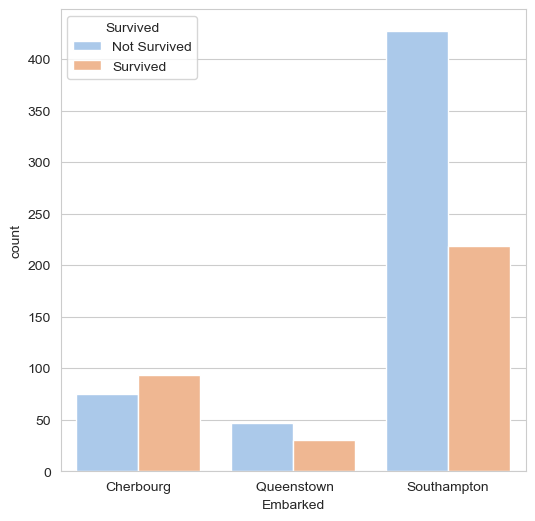

In [11]:
data['Survived']=data['Survived'].map({0:'dead',1:'alive'})
data['Embarked']=data['Embarked'].map({0:'Cherbourg',1:' Queenstown',2:'Southampton'})
plt.figure(figsize=(6, 6))
sns.countplot(x='Embarked', hue='Survived', data= data, palette='pastel')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

VISUALIZING SURVIVAL COUNT BASED UPON THE FARE

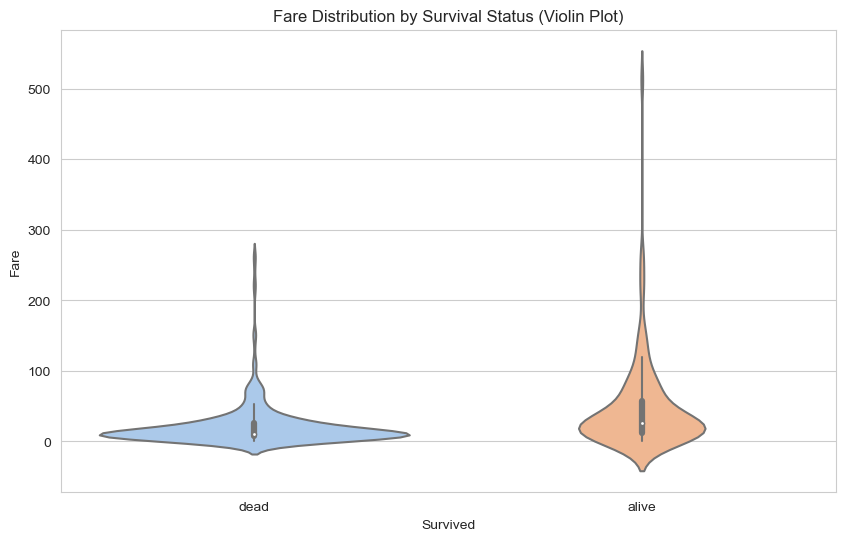

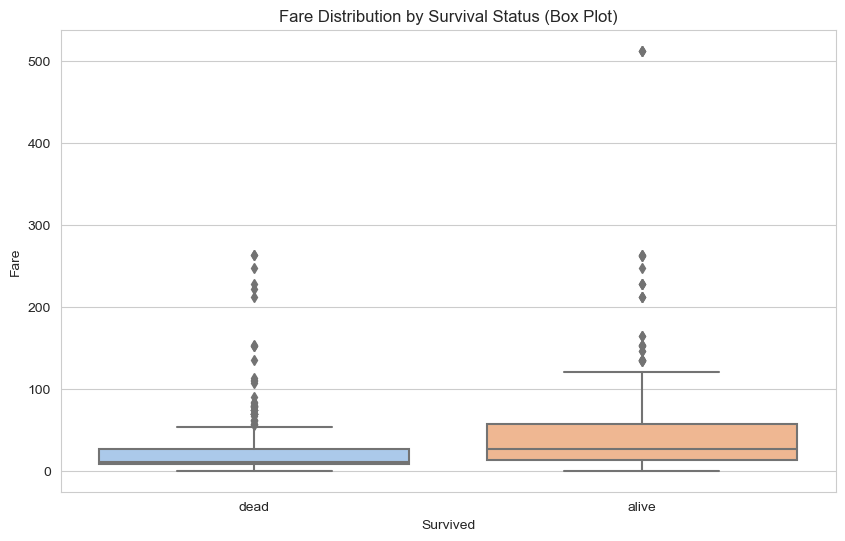

In [12]:
#Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=data, palette='pastel')

plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survival Status (Violin Plot)')
plt.show()

#Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=data, palette='pastel')

plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survival Status (Box Plot)')
plt.show()


 THANK YOU
